---
title: Solar Wind Overview
---

In [1]:
import sys
import yaml

import pyspedas
from space_analysis.ds.tplot import Config, export, process_panel

import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "nature", "notebook"])
plt.rc("savefig", dpi=300)
plt.rc('figure.subplot', wspace = 0, hspace = 0)

In [2]:
file_path = sys.argv[1]

In [3]:
config = yaml.load(open(file_path), Loader=yaml.FullLoader)
config = Config(**config)
tvars2plot = []

In [4]:
def process(tvar, **kwargs):
    res = 3600 * 24 * 2
    tvar2plot = pyspedas.avg_data(tvar, res=res)

    if isinstance(tvar2plot, list):
        return tvar2plot[0]
    else:
        return tvar2plot


In [5]:
for p_config in config.panels:
    tvar2plot = process_panel(p_config, process_func=process)
    tvars2plot.append(tvar2plot)

31-Jan-24 01:23:20: /Users/zijin/micromamba/envs/space_analysis/lib/python3.12/site-packages/pytplot/store_data.py:155: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  times = [datetime.datetime.utcfromtimestamp(time) if np.isfinite(time) else datetime.datetime.utcfromtimestamp(0) for time in times]

31-Jan-24 01:23:20: avg_data was applied to: plasmaDensity-avg
31-Jan-24 01:23:22: /Users/zijin/micromamba/envs/space_analysis/lib/python3.12/site-packages/pytplot/store_data.py:155: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  times = [datetime.datetime.utcfromtimestamp(time) if np.isfinite(time) else datetime.dateti

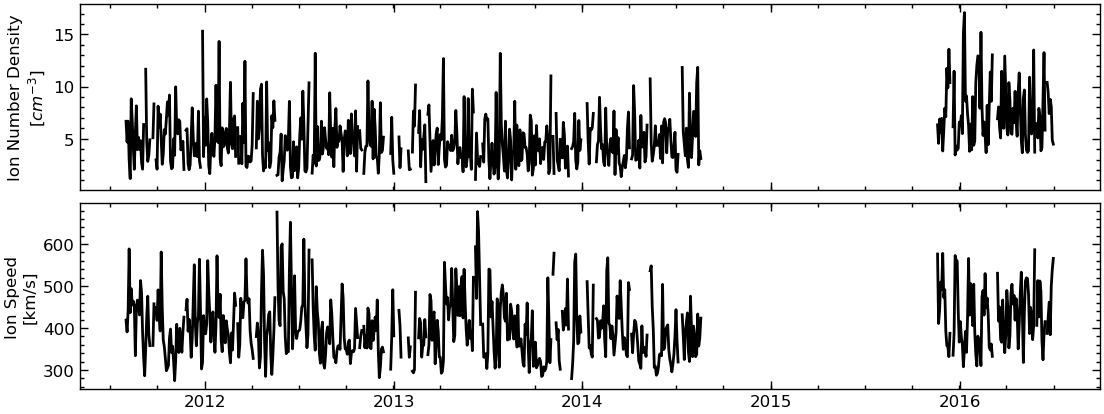

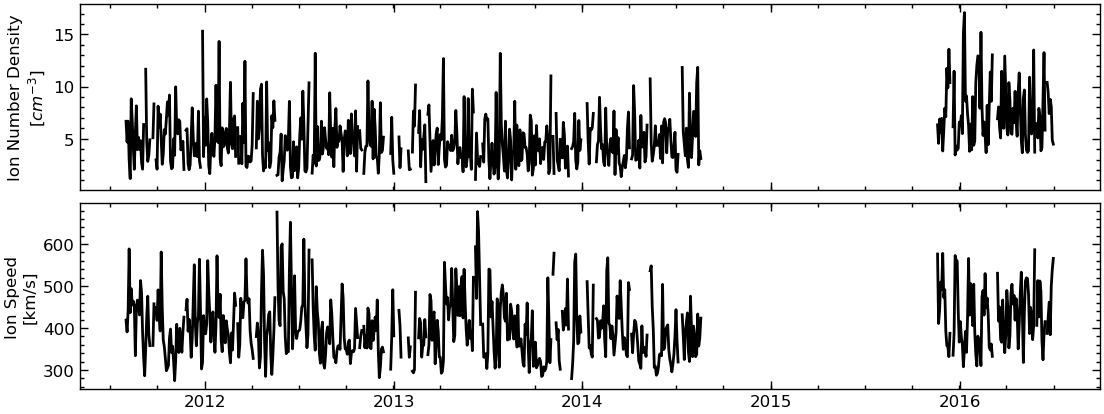

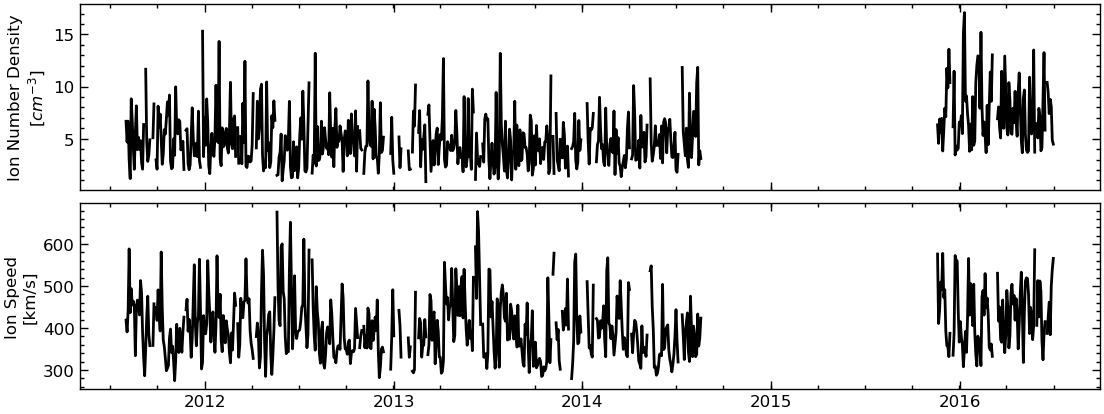

In [6]:
export(tvars2plot, config.output)